In [554]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

artists = pd.read_csv('./data/artists.csv')
artworks = pd.read_csv('./data/artworks.csv')

## ARTISTS

## Age

In [555]:
# substracting Birth Year from Death year to get artists Age at the time of death
artists['Age'] = artists['Death Year'] - artists['Birth Year']

### Artists who lived for more than a century, with the exception of the first row which represents a company rather than an individual:

In [556]:
artists[artists['Age'] >= 100].sort_values(by="Age", ascending=False).head(5)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
12486,38294,"Union Paper Bag Machine Company, Philadelphia, PA",NaN,NaN,1869.0,1999.0,130.0
9164,23931,B. Efimov,Russian,Male,1900.0,2008.0,108.0
3449,3844,Leni Matthaei,German,Female,1873.0,1981.0,108.0
13568,43532,Manoel de Oliveira,Portuguese,NaN,1908.0,2015.0,107.0
9306,24431,Horacio Coppola,Argentine,Male,1906.0,2012.0,106.0


### Average and Median age of artists in the collection at the time of their death:


In [557]:
average_age = artists['Age'].mean()
median_age = artists["Age"].median()
print("Average age:", average_age)
print("Median age:", median_age)

Average age: 72.32501095050372
Median age: 75.0


### The bell-shaped curve suggests that most artists lived until their seventies, with the median age of death being 75.0 years:

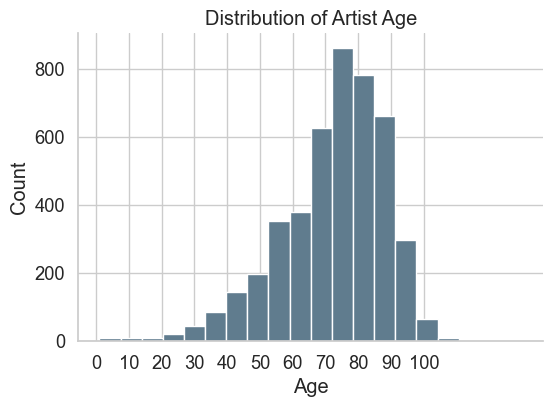

In [558]:
artists_age = artists.dropna(subset=['Age'])
# histogram plot
sns.set(style='whitegrid', font_scale=1.2)  
plt.figure(figsize=(6, 4))  
plt.hist(artists_age['Age'], bins=20, color='#607c8e', edgecolor='white') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Distribution of Artist Age')  
plt.xticks(range(0, 101, 10))  
sns.despine()  

plt.show()  

## Gender

### The fact that 81.8% of artists in MoMA's collection are male suggests a gender imbalance in the art world.

In [559]:
artists['Gender'] = artists['Gender'].str.lower()
artist_gender = artists['Gender'].value_counts()
artist_gender

Gender
male      9826
female    2193
Name: count, dtype: int64

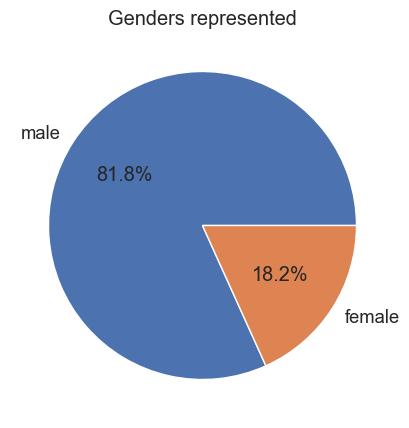

In [560]:
# pie plot
plt.figure(figsize=(7, 5))  
plt.pie(artist_gender, labels=artist_gender.index.tolist(), autopct='%1.1f%%') 
plt.title("Genders represented") 

plt.show() 

## Gender & Age

### The average age of female artists is 3.03 years longer than of male ones:

In [561]:
male_artists = artists[artists['Gender'] == 'male']['Age'].mean()
female_artists = artists[artists['Gender']== 'female']['Age'].mean()
print(f'Average age of male artists is {male_artists} years')
print(f'Average age of female artists is {female_artists} years')

Average age of male artists is 72.43200202224469 years
Average age of female artists is 75.53754940711462 years


## Nationality


### Five most common nationalities among the artists featured in MoMA's collection:

In [562]:
top_nationalities = artists['Nationality'].value_counts().head(5)
top_nationalities

Nationality
American    5198
German       930
French       839
British      835
Italian      531
Name: count, dtype: int64

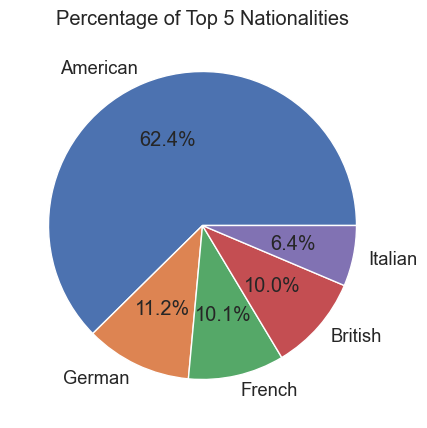

In [563]:
# pie plot
plt.figure(figsize=(7, 5))  
plt.pie(top_nationalities, labels=top_nationalities.index.tolist(), autopct='%1.1f%%') 
plt.title('Percentage of Top 5 Nationalities') 

plt.show() 


## Nationality & Gender

### Number of Male and Female Artists by Nationality (Top 5)

In [564]:
nationality_gender = artists.groupby(['Nationality', 'Gender']).size().unstack()
nationality_gender_top_5 = nationality_gender.loc[top_nationalities.index]

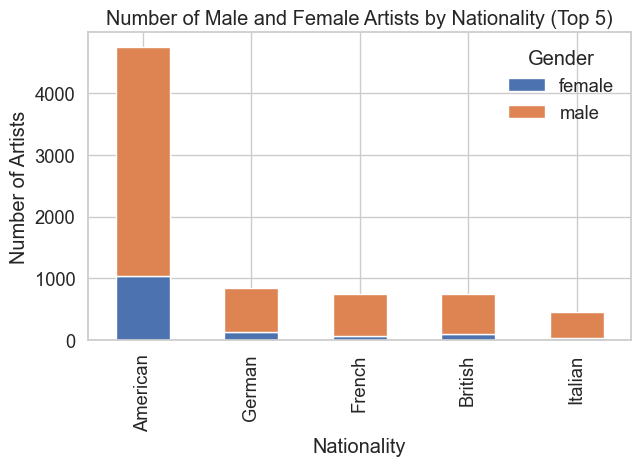

In [565]:
nationality_gender_top_5.plot(kind='bar', stacked=True, figsize=(7, 4))

plt.title('Number of Male and Female Artists by Nationality (Top 5)')
plt.xlabel('Nationality')
plt.ylabel('Number of Artists')

plt.show()

## ARTWORKS

### Total of 130,262 artworks

In [566]:
artworks['Artwork ID'].shape[0]

130262

### Top 10 art mediums represented in MoMA's collection

In [567]:
artworks['Classification'].value_counts().head(10)

Classification
Print                        30807
Photograph                   29909
Illustrated Book             26160
Drawing                      11735
Design                       11223
Mies van der Rohe Archive     3331
Architecture                  2947
Video                         2363
Film                          2292
Painting                      2270
Name: count, dtype: int64

## ARTISTS & ARTWORKS

In [568]:
artists_and_artworks = pd.concat([artists,artworks],join='inner',keys='Artist ID')
top_artists = artists_and_artworks['Name'].value_counts()[:10]

### Top 10 artists with greatest number of artworks on display at MoMA

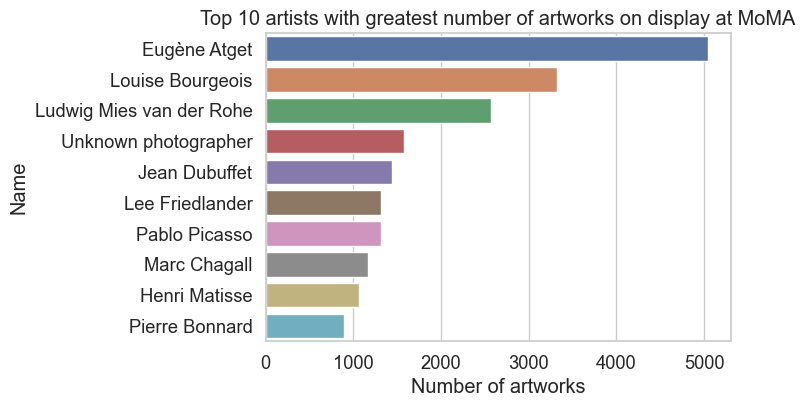

In [569]:
# bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.xlabel('Number of artworks')
plt.xticks(rotation=0)
plt.title('Top 10 artists with greatest number of artworks on display at MoMA')
plt.show()

#### The fact that the top ten artists with the most artworks in MoMA's collection come from different nationalities, with 5 from France, 3 from the United States, and 1 from Spain, is noteworthy. This suggests that modern art has a global reach and has influenced artists from various parts of the world. Additionally, it's worth noting that despite the smaller representation of female artists, the second-ranked on the list is Louise Bourgeois, a female artist.

## Artworks & Nationalities

In [570]:
cp = artists # making a copy of artists dataframe
aa_merged = pd.merge(cp, artworks, on='Artist ID') # merging artists with artworks by Artist ID

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
american_count = aa_merged[aa_merged['Nationality'] == 'American'].shape[0]

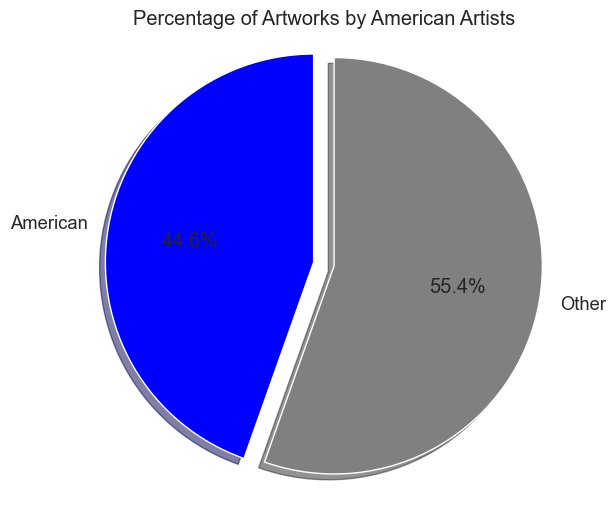

In [ ]:
sizes = [american_count, aa_merged.shape[0] - american_count]
labels = ['American', 'Other']
colors = ['blue', 'gray']
explode = (0.1, 0)
# pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of Artworks by American Artists')
plt.show()


#### while the majority of artists in MoMA's collection are American (62%), the majority of artworks in the collection are actually created by artists of other nationalities, with American artists contributing 44.6% of the artworks and artists of other nationalities contributing 55.4%. This suggests that MoMA's collection is truly global and represents a diverse range of artistic styles and traditions from around the world.

## Artworks & Gender

In [ ]:
artworks_gender = aa_merged[['Gender']].value_counts()
artworks_gender

Gender
male      99984
female    16193
Name: count, dtype: int64

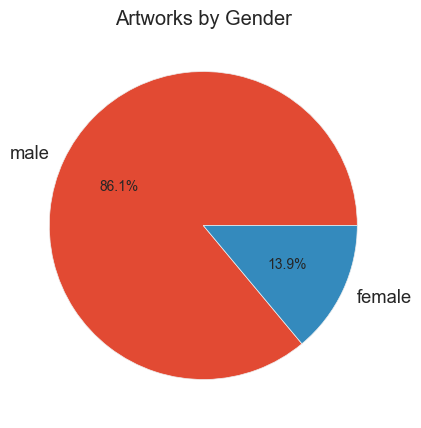

In [ ]:
# pie plot
plt.figure(figsize=(7, 5))  
plt.pie(artworks_gender, labels=artist_gender.index.tolist(), autopct='%1.1f%%') 
plt.title("Artworks by Gender") 

plt.show() 

## Gender & Art Departmant

In [ ]:
department_and_gender = aa_merged.groupby(['Gender', 'Department']).size().unstack()

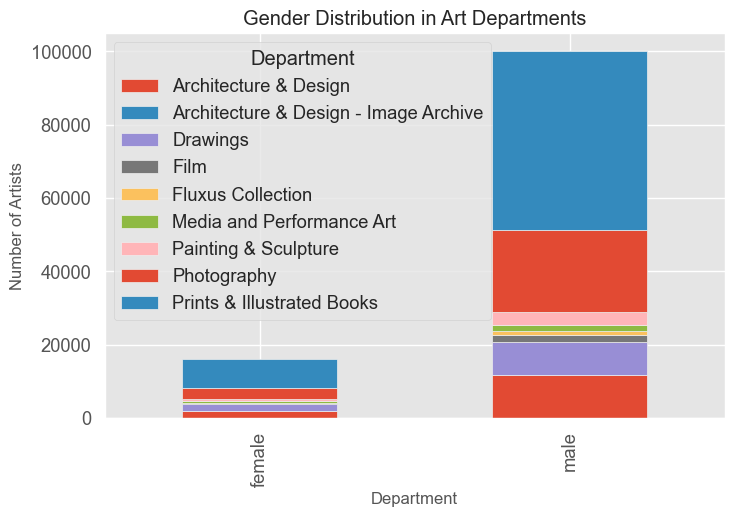

In [ ]:
department_and_gender.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.title('Gender Distribution in Art Departments')
plt.xlabel('Department')
plt.ylabel('Number of Artists')

plt.show()